In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
source_data = pd.read_clipboard()

In [4]:
source_data.head()

,日期,商品,Sessions,Views,Clicks,Natural Flow,全部销售额,自然销售额,广告销售额,广告花费,页面深度系数,广告流量占比,广告销售占比,ACOS,整体ACOS,扣佣盈余
0,2020/12/1,men sweatshirt,5,6,7,-2,$0.00,$0.00,$0.00,$8.58,120.00%,140.00%,0.00%,0.00%,0.00%,$-8.58
1,2020/12/1,women jacket,2,2,1,1,$0.00,$0.00,$0.00,$1.09,100.00%,50.00%,0.00%,0.00%,0.00%,$-1.09
2,2020/12/1,women vest,8,13,8,0,$0.00,$0.00,$0.00,$7.73,162.50%,100.00%,0.00%,0.00%,0.00%,$-7.73
3,2020/12/1,women yoga leggings,13,15,14,-1,$21.64,$1.65,$19.99,$21.70,115.38%,107.69%,92.38%,108.55%,100.28%,$-3.31
4,2020/12/2,men sweatshirt,14,17,5,9,$26.74,$26.74,$0.00,$7.23,121.43%,35.71%,0.00%,0.00%,27.04%,$15.50


# 转换数据格式

In [5]:
# 日期
source_data['日期'] = pd.to_datetime(source_data['日期'])
# 金额
source_data['全部销售额'] = source_data['全部销售额'].apply(lambda x: float(x[1:]))
source_data['自然销售额'] = source_data['自然销售额'].apply(lambda x: float(x[1:]))
source_data['广告销售额'] = source_data['广告销售额'].apply(lambda x: float(x[1:]))
source_data['广告花费'] = source_data['广告花费'].apply(lambda x: float(x[1:]))
source_data['扣佣盈余'] = source_data['扣佣盈余'].apply(lambda x: float(x[1:]))
# 百分比
source_data['页面深度系数'] = source_data['页面深度系数'].apply(lambda x: float(x[:-1])/100)
source_data['广告流量占比'] = source_data['广告流量占比'].apply(lambda x: float(x[:-1])/100)
source_data['广告销售占比'] = source_data['广告销售占比'].apply(lambda x: float(x[:-1])/100)
source_data['ACOS'] = source_data['ACOS'].apply(lambda x: float(x[:-1])/100)
source_data['整体ACOS'] = source_data['整体ACOS'].apply(lambda x: float(x[:-1])/100)

In [6]:
men_sweatshirt = source_data[source_data['商品']=='men sweatshirt']

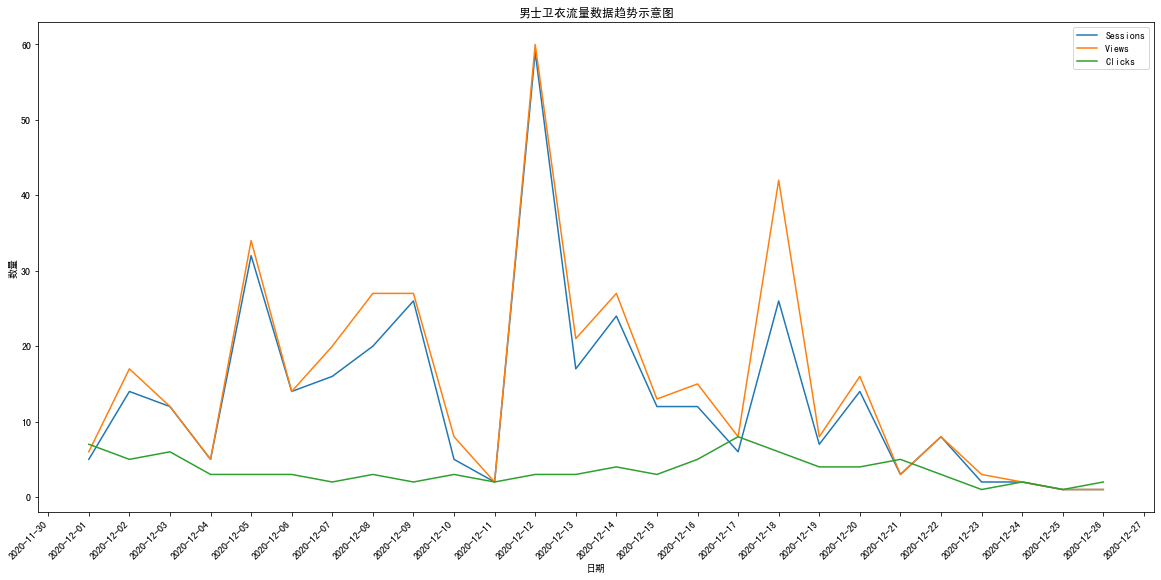

In [8]:
fig = plt.figure(figsize=(20, 10))

x = men_sweatshirt['日期']
y_sessions = men_sweatshirt['Sessions']
y_views = men_sweatshirt['Views']
y_clicks = men_sweatshirt['Clicks']

plt.plot(x, y_sessions, label='Sessions')
plt.plot(x, y_views, label='Views')
plt.plot(x, y_clicks, label='Clicks')


plt.title('男士卫衣流量数据趋势示意图')
plt.xlabel('日期')
plt.ylabel('数量')

# 获取图坐标信息
ax = plt.gca()
# 设置边框颜色
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
# 设置日期的显示格式  
# date_format = mpl.dates.DateFormatter("%m-%d")  
# ax.xaxis.set_major_formatter(date_format) 
# 设置x轴每个刻度的间隔天数
xlocator = mpl.ticker.MultipleLocator(1)
ax.xaxis.set_major_locator(xlocator)
# 为了避免x轴日期刻度标签的重叠设置x轴刻度自动展现并且45度倾斜
fig.autofmt_xdate(rotation = 45)
plt.legend()
plt.show()